### **Heat Equation**

The heat equation is given by:

$$\frac{\partial u}{\partial t} = k \frac{\partial^2 u}{\partial x^2}$$

where:
- $u$ is the temperature,
- $t$ is the time,
- $x$ is the position,
- $k$ is the thermal diffusivity of the material.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

**Problem Definition**

In [16]:
# Caracteristics of a rod
length = 10
k = 0.89
# Boundary conditions
temp_left = 100
temp_right = 200
total_sim_time = 10

**Data**

In [17]:
dx = 0.1
x_vector = np.linspace(0, length, int(length/dx))
x_vector[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

In [18]:
dt = 0.0001
t_vector = np.linspace(0, length, int(total_sim_time/dt))
t_vector[:10]

array([0.        , 0.0001    , 0.0002    , 0.0003    , 0.0004    ,
       0.00050001, 0.00060001, 0.00070001, 0.00080001, 0.00090001])

**Initial conditions**

In [21]:
u = np.zeros([len(t_vector), len(x_vector)])
u.shape

(100000, 100)

In [22]:
# Initial Conditions
u[:, 0] = temp_left
u[:, -1] = temp_right
u

array([[100.,   0.,   0., ...,   0.,   0., 200.],
       [100.,   0.,   0., ...,   0.,   0., 200.],
       [100.,   0.,   0., ...,   0.,   0., 200.],
       ...,
       [100.,   0.,   0., ...,   0.,   0., 200.],
       [100.,   0.,   0., ...,   0.,   0., 200.],
       [100.,   0.,   0., ...,   0.,   0., 200.]])

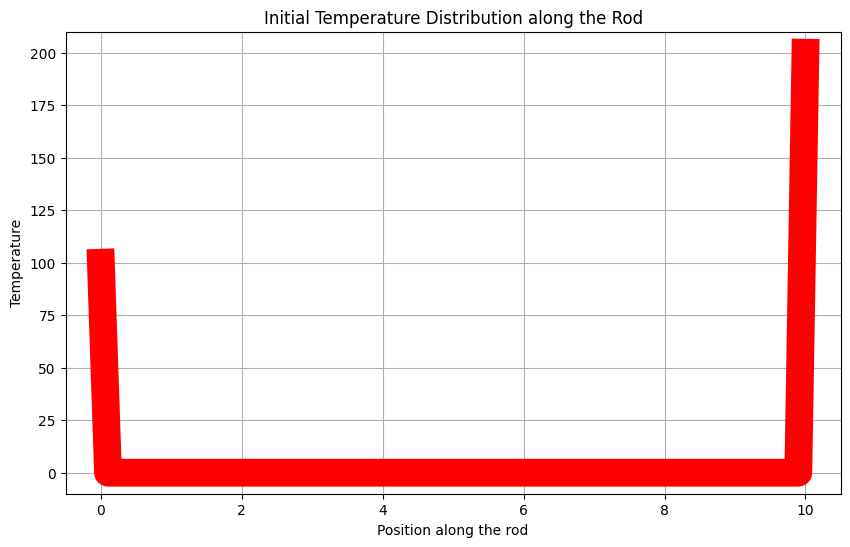

In [30]:
plt.figure(figsize=(10, 6))  
plt.plot(x_vector, u[0], 'r-', linewidth=20)  

plt.title('Initial Temperature Distribution along the Rod')
plt.xlabel('Position along the rod')
plt.ylabel('Temperature')

plt.grid(True)
plt.show()

#### **Discretize Heat Equation**

The finite difference approximation of the heat equation is given by:

$$\frac{u - u_{i}^{n}}{\Delta t} = k \frac{u_{i+1}^{n} - 2u_{i}^{n} + u_{i-1}^{n}}{\Delta x^2}$$

where:
- $u_{i}^{n}$ is the temperature at position $i$ and time $n$,
- $\Delta t$ is the time step,
- $\Delta x$ is the spatial step,
- $k$ is the thermal diffusivity of the material.

In [38]:
for t in range(1, len(t_vector)-1):
    for x in range(1, len(x_vector)-1):
        u[t+1, x] = ((k * (dt/dx**2)) * (u[t, x+1] - 2*u[t, x] + u[t, x-1])) + u[t, x]

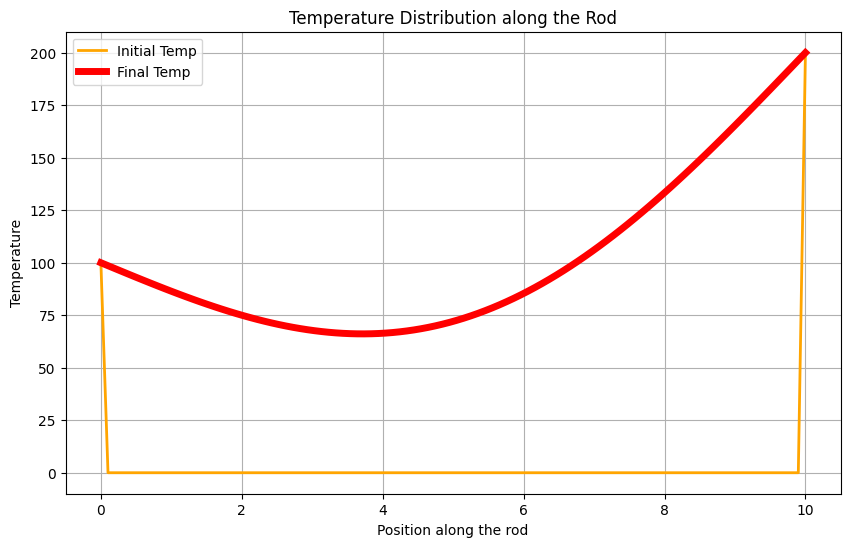

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(x_vector, u[0], 'orange', linewidth=2, label='Initial Temp')
plt.plot(x_vector, u[-1], 'r', linewidth=5, label='Final Temp')
plt.title('Temperature Distribution along the Rod')
plt.xlabel('Position along the rod')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()